<div style='width=100%'><img  src=https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png width=200></div>

<ul style='font-family: "Times New Roman", Times, serif;'>ESTUDIANTES
    <li>Adilem Dobras</li><li>Alvaro Martinez</li></ul>

<ol>Informacion destacable del trabajo:
<li>Las V de la tabla son verificaciones</li>
<li>Los h son la cuenta de los registros en las 24 horas del dia</li>
<li>Estos registros son unicamente del año 2022 y del mes 09</li></ol>

In [161]:
import pandas as pd
import mysql
import mysql.connector
import mysql.connector
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [162]:
connection = mysql.connector.connect(host='127.0.0.1',
                                         user='root',
                                         password='1234', port='3306')
cursor=connection.cursor(buffered=True)


In [163]:
cursor.execute('CREATE DATABASE  if not exists control_clima;')
cursor.execute("USE control_clima;")

In [164]:
def query(consulta):
    cursor.execute(consulta)
    connection.commit()
    

In [165]:
#creamos la tabla municipios
query("CREATE TABLE IF NOT EXISTS Municipios (id_municipios INT NOT NULL, municipios VARCHAR (100) not null, PRIMARY KEY (id_municipios));")

In [166]:
#insertamos los municipios en la base de datos
query("INSERT INTO Municipios (id_municipios, municipios) VALUES (5,'ALCALÁ DE HENARES'),(6,'ALCOBENDAS'),(7,'ALCORCON'),(9,'ALGETE'),"
      +"(13,'ARANJUEZ'),(14,'ARGANDA DEL REY'),(16,'EL ATAZAR'),(45,'COLMENAR VIEJO'),(47,'COLLADO VILLALBA'),(49,'COSLADA'),"+
     "(58,'FUENLABRADA'),(65,'GETAFE'),(67,'GUADALIX DE LA SIERRA'),(74,'LEGANEZ'),(80,'MAJADAHONDA'),(92,'MOSTOLES'),(102,'ORUSCO DE TAJUÑA'),"
     +"(120,'PUERTO DE COTOS'),(123,'RIVAS-VACIAMADRID'),(133,'SAN MARTÍN DE VALDEIGLESIAS'),(148,'TORREJÓN DE ARDOZ'),(161,'VALDEMORO'),(171,'VILLA DEL PRADO'),(180,'VILLAREJO DE SALVANÉS');")

IntegrityError: 1062 (23000): Duplicate entry '5' for key 'municipios.PRIMARY'

In [167]:
#creamos la tabla de magnitudes
query("CREATE TABLE IF NOT EXISTS Magnitud (id_magnitud INT NOT NULL, magnitud VARCHAR (100) NOT NULL, PRIMARY KEY (id_magnitud));")

In [168]:
#insertamos los valores de las magnitudes que vamos a seleccionar
query("INSERT INTO Magnitud (id_magnitud, magnitud) VALUES (6,'Monóxido de Carbono'),(12,'Óxidos de Nitrógeno'),(14,'Ozono');")

IntegrityError: 1062 (23000): Duplicate entry '6' for key 'magnitud.PRIMARY'

In [169]:
#creamos la tabla de contenido de estudio
query('CREATE TABLE IF NOT EXISTS Datos_Climaticos (id INT NOT NULL, Municipio INT NOT NULL, Magnitud  INT NOT NULL, Ano  INT NOT NULL, Mes  INT NOT NULL, Dia  INT NOT NULL,'
    +'h01 FLOAT,h02 FLOAT,h03 FLOAT,h04 FLOAT,h05 FLOAT,h06 FLOAT,h07 FLOAT,h08 FLOAT,h09 FLOAT,h10 FLOAT,h11 FLOAT,h12 FLOAT,h13 FLOAT,'
     +'h14 FLOAT,h15 FLOAT,h16 FLOAT,h17 FLOAT,h18 FLOAT,h19 FLOAT,h20 FLOAT,h21 FLOAT,h22 FLOAT,h23 FLOAT,h24 FLOAT,PRIMARY KEY (id), FOREIGN KEY (Municipio) REFERENCES Municipios(id_municipios),FOREIGN KEY (Magnitud) REFERENCES Magnitud(id_magnitud));')

In [170]:
#Monóxido de carbono->6
#oxidos de nitrogeno->12
#ozono->14

#df.pop('municipio')
#df.pop('provincia')
#df.pop('estacion')


#realizar un histograma de cada uno de los campos seleccionados
#hay que preguntarse cosas
#en que años ha sido peor el ozono-nitrogeno-monoxido de carbono
#en que municipios se ha mostrado que la magnitud es mas alto o mas leve
#realizar dos histogramas dentro de uno
#¿QUe paises superan el limite de ozono (grafico con municipios vs valores) grafico de barras
#aumento de ozono mes a mes
#aumento de ozono en un mes especifico->tal que cual fue el mes con mas ozono y luego graficarlo
#diagrama de distribucion de ozono vs municipios
#https://www.epdata.es/datos/cambio-climatico-datos-graficos/447 
#niveles de ozono en parte por millon por año
#recta de regresion lineal 
#mapa de coloracion segun gravedad de ozono


df = pd.read_csv('calidad_aire_datos_mes.csv',sep=';')
nombremuni=[]
for mun in df["municipio"]:
    x=str(mun)
    if (x!="nan"):
        cursor.execute("SELECT municipios FROM municipios where id_municipios="+x)
        municipios = cursor.fetchall()
        nombremuni.append(municipios[0][0])

df.drop( columns=['municipio'], axis=1, inplace=True, errors='ignore')
df.insert(loc=2, column="municipio", value=nombremuni)

fechas=[]
for i in range(len(df)):
    x=str(df.iloc[i]["dia"])+"/"+str(df.iloc[i]["mes"])+"/"+str(df.iloc[i]["ano"])

    fechas.append(x)


df.drop( columns=['dia',"mes","ano"], axis=1, inplace=True, errors='ignore')
df.insert(loc=5, column="fecha", value=fechas)
df




,provincia,estacion,municipio,magnitud,punto_muestreo,fecha,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,1,ORUSCO DE TAJUÑA,1,28102001_1_38,1/9/2022,3.0,V,3.0,V,...,2.0,V,3.0,V,2.0,V,2.0,V,2.0,V
1,28,1,ORUSCO DE TAJUÑA,6,28102001_6_48,1/9/2022,0.3,V,0.3,V,...,0.3,V,0.3,V,0.3,V,0.3,V,0.3,V
2,28,1,ORUSCO DE TAJUÑA,7,28102001_7_8,1/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,1,ORUSCO DE TAJUÑA,8,28102001_8_8,1/9/2022,7.0,V,8.0,V,...,6.0,V,7.0,V,5.0,V,5.0,V,5.0,V
4,28,1,ORUSCO DE TAJUÑA,10,28102001_10_49,1/9/2022,11.0,V,10.0,V,...,16.0,V,12.0,V,12.0,V,9.0,V,10.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,28,5,MOSTOLES,7,28092005_7_8,26/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4182,28,5,MOSTOLES,8,28092005_8_8,26/9/2022,4.0,V,4.0,V,...,23.0,V,17.0,V,12.0,V,22.0,V,16.0,V
4183,28,5,MOSTOLES,10,28092005_10_49,26/9/2022,5.0,V,7.0,V,...,9.0,V,10.0,V,12.0,V,11.0,V,11.0,V
4184,28,5,MOSTOLES,12,28092005_12_8,26/9/2022,6.0,V,6.0,V,...,25.0,V,19.0,V,14.0,V,24.0,V,18.0,V


In [171]:
df


,provincia,estacion,municipio,magnitud,punto_muestreo,fecha,h01,v01,h02,v02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,1,ORUSCO DE TAJUÑA,1,28102001_1_38,1/9/2022,3.0,V,3.0,V,...,2.0,V,3.0,V,2.0,V,2.0,V,2.0,V
1,28,1,ORUSCO DE TAJUÑA,6,28102001_6_48,1/9/2022,0.3,V,0.3,V,...,0.3,V,0.3,V,0.3,V,0.3,V,0.3,V
2,28,1,ORUSCO DE TAJUÑA,7,28102001_7_8,1/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
3,28,1,ORUSCO DE TAJUÑA,8,28102001_8_8,1/9/2022,7.0,V,8.0,V,...,6.0,V,7.0,V,5.0,V,5.0,V,5.0,V
4,28,1,ORUSCO DE TAJUÑA,10,28102001_10_49,1/9/2022,11.0,V,10.0,V,...,16.0,V,12.0,V,12.0,V,9.0,V,10.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,28,5,MOSTOLES,7,28092005_7_8,26/9/2022,1.0,V,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4182,28,5,MOSTOLES,8,28092005_8_8,26/9/2022,4.0,V,4.0,V,...,23.0,V,17.0,V,12.0,V,22.0,V,16.0,V
4183,28,5,MOSTOLES,10,28092005_10_49,26/9/2022,5.0,V,7.0,V,...,9.0,V,10.0,V,12.0,V,11.0,V,11.0,V
4184,28,5,MOSTOLES,12,28092005_12_8,26/9/2022,6.0,V,6.0,V,...,25.0,V,19.0,V,14.0,V,24.0,V,18.0,V


In [172]:
#eliminamos las columnas que no nos interesan
df.drop( columns=['estacion','punto_muestreo'], axis=1, inplace=True, errors='ignore')

In [173]:
#eliminas las columnas que tengan las verificaciones
df = df.drop(df.filter(regex='v').columns, axis=1,errors='ignore')

In [174]:
#selecciono los elementos que contienen las magnitudes 6, 12 y 14 con los que voy a trabajar
x=df[(df['magnitud'] == 6)|(df['magnitud'] == 12)|(df['magnitud'] == 14)]

x

,municipio,magnitud,fecha,h01,h02,h03,h04,h05,h06,h07,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
1,ORUSCO DE TAJUÑA,6,1/9/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
5,ORUSCO DE TAJUÑA,12,1/9/2022,9.0,10.0,10.0,9.0,8.0,8.0,8.0,...,6.0,6.0,5.0,5.0,6.0,8.0,9.0,7.0,7.0,7.0
6,ORUSCO DE TAJUÑA,14,1/9/2022,100.0,96.0,92.0,85.0,84.0,79.0,78.0,...,117.0,116.0,114.0,112.0,103.0,91.0,92.0,86.0,91.0,88.0
11,PUERTO DE COTOS,12,1/9/2022,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
12,PUERTO DE COTOS,14,1/9/2022,121.0,122.0,116.0,112.0,111.0,111.0,109.0,...,129.0,126.0,124.0,121.0,111.0,106.0,109.0,107.0,110.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,ALGETE,12,26/9/2022,4.0,4.0,4.0,5.0,6.0,7.0,8.0,...,NaN,9.0,11.0,11.0,11.0,9.0,7.0,7.0,6.0,7.0
4178,ALGETE,14,26/9/2022,77.0,79.0,80.0,78.0,78.0,77.0,73.0,...,100.0,100.0,103.0,94.0,88.0,79.0,77.0,77.0,78.0,79.0
4180,MOSTOLES,6,26/9/2022,0.5,0.5,0.5,0.5,0.5,0.5,0.6,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4184,MOSTOLES,12,26/9/2022,6.0,6.0,6.0,8.0,17.0,22.0,34.0,...,7.0,5.0,7.0,15.0,24.0,25.0,19.0,14.0,24.0,18.0


In [175]:
#ASUNTO NO ME DEJA GUARDAR EL CSV EN LA BASE DE DATOS
#query("BULK INSERT Datos_Climaticos FROM 'C:\calidad_aire_datos_mes.csv' WITH (FIRSTROW=2,FIELDTERMINATOR = ';',"
# +"ROWTERMINATOR = '\n',FORMAT='CSV'"+
#    ");")

In [176]:
#ya que tengo el csv que quiero lo descargo y lo importo a sql
x.to_csv('Datos_Climaticos.csv')

In [177]:
#saco la tabla de solo emiciones de ozono
ozono=x[(x['magnitud'] == 14)]
ozono
#x.plot( 'ano', x.iloc[:,5:30] ) 

,municipio,magnitud,fecha,h01,h02,h03,h04,h05,h06,h07,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
6,ORUSCO DE TAJUÑA,14,1/9/2022,100.0,96.0,92.0,85.0,84.0,79.0,78.0,...,117.0,116.0,114.0,112.0,103.0,91.0,92.0,86.0,91.0,88.0
12,PUERTO DE COTOS,14,1/9/2022,121.0,122.0,116.0,112.0,111.0,111.0,109.0,...,129.0,126.0,124.0,121.0,111.0,106.0,109.0,107.0,110.0,107.0
17,RIVAS-VACIAMADRID,14,1/9/2022,36.0,50.0,54.0,39.0,20.0,10.0,10.0,...,103.0,100.0,94.0,85.0,77.0,66.0,62.0,73.0,72.0,70.0
22,ARANJUEZ,14,1/9/2022,83.0,82.0,75.0,55.0,42.0,35.0,32.0,...,113.0,110.0,103.0,92.0,75.0,77.0,78.0,82.0,83.0,80.0
27,SAN MARTÍN DE VALDEIGLESIAS,14,1/9/2022,102.0,100.0,99.0,98.0,95.0,80.0,75.0,...,104.0,106.0,110.0,114.0,113.0,108.0,102.0,96.0,95.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,ALCORCON,14,26/9/2022,67.0,68.0,70.0,70.0,62.0,55.0,50.0,...,91.0,91.0,88.0,79.0,64.0,64.0,65.0,62.0,60.0,55.0
4168,LEGANEZ,14,26/9/2022,72.0,72.0,73.0,72.0,64.0,55.0,49.0,...,99.0,99.0,93.0,78.0,51.0,46.0,56.0,45.0,38.0,31.0
4173,MAJADAHONDA,14,26/9/2022,80.0,83.0,83.0,83.0,80.0,67.0,53.0,...,104.0,102.0,98.0,87.0,82.0,74.0,67.0,63.0,68.0,57.0
4178,ALGETE,14,26/9/2022,77.0,79.0,80.0,78.0,78.0,77.0,73.0,...,100.0,100.0,103.0,94.0,88.0,79.0,77.0,77.0,78.0,79.0


In [183]:
#sacamos las medias de las filas
horas=ozono.iloc[:,3:]
mean_horas=horas.mean(axis=1)
media_horas=pd.DataFrame(data=mean_horas)
ozono.drop( df.iloc[:, 3:], axis=1, inplace=True, errors='ignore')
ozono['media_dia'] = media_horas

ozono
#df_muestras=pd.DataFrame(data=mes)

c:\Users\alvar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-183-85ca8ada54d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozono['media_dia'] = media_horas


,municipio,magnitud,fecha,media_dia
6,ORUSCO DE TAJUÑA,14,1/9/2022,97.625000
12,PUERTO DE COTOS,14,1/9/2022,117.583333
17,RIVAS-VACIAMADRID,14,1/9/2022,66.750000
22,ARANJUEZ,14,1/9/2022,79.000000
27,SAN MARTÍN DE VALDEIGLESIAS,14,1/9/2022,99.916667
...,...,...,...,...
4162,ALCORCON,14,26/9/2022,69.000000
4168,LEGANEZ,14,26/9/2022,67.500000
4173,MAJADAHONDA,14,26/9/2022,79.333333
4178,ALGETE,14,26/9/2022,83.272727


Int64Index([12, 47, 65, 387, 548, 226, 3554, 3393, 153, 27], dtype='int64')


[Text(0.5, 0, 'Municipios'), Text(0, 0.5, 'Dias')]

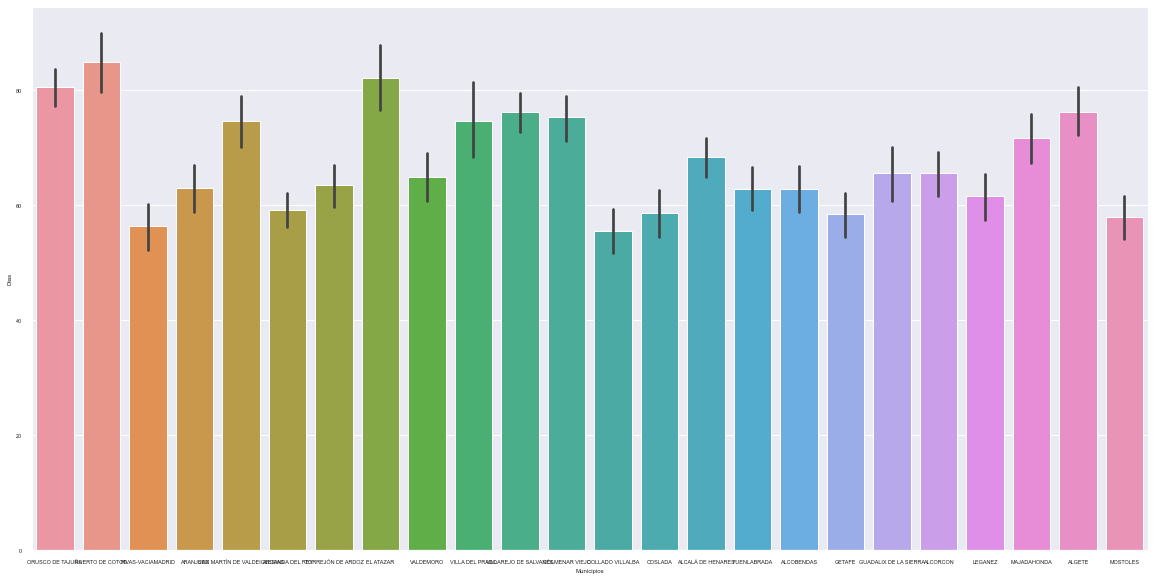

In [186]:
#saco los 10 municipios con mas ozono
dia_=ozono['media_dia'].nlargest(n=10)
dia_index=dia_.index
print(dia_index)
for dia in dia_index:
    ozono_municipio=ozono['municipio'][dia]
    #print(ozono_municipio)
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale=0.5)
plt = sns.barplot(x = ozono['municipio'], y = ozono['media_dia'])
plt.set(xlabel = "Municipios", ylabel = "Dias")


In [180]:
#Grafico del dia que hubieron mas emisiones de ozono
#¿En que dia del mes se ha visto una media mas alta en las emiciones de ozono?

In [208]:

#muestra las emisiones mas altas en el dia por municipios
valores_max=ozono.iloc[:,3:].max()
print(valores_max)
#saco la posicion de la fila con el valor maximo
i=ozono.iloc[:,3:].idxmax()
#guardo los valores maximos en un df
df_valores_max=pd.DataFrame(data=valores_max)
municipios_max=ozono['municipio'][i]
dia_max=ozono['fecha'][i]
df_municipios=pd.DataFrame(data=municipios_max)
df_dia=pd.DataFrame(data=dia_max)
#le quitamos los indices que no usaremos
a=df_valores_max.reset_index(drop=True)
b=df_municipios.reset_index(drop=True)
c=df_dia.reset_index(drop=True)
#consultamos los municipios que estamos viendo
#AQUI SE DEBE REALIZAR UNA QUERY PARA QUE ME REMPLACE LOS ID_MUNICIPIOS POR LOS NOMBRES
array_nombres=[]
# Ahora podemos recorrer todos los usuarios
#for m in b['municipio']:
#    cursor.execute("SELECT municipios FROM municipios where id_municipios="+str(m))
#    municipios = cursor.fetchall()
#    array_nombres.append(municipios)

nombres=pd.DataFrame(array_nombres)
#conexion.close()
#mezclamos las columnas
b.insert(loc=1, column="dia", value=c)
b.insert(loc=2, column="maximo_valor_dia", value=a)
#elimino la columna de id de municipio 
#b.drop( columns=['municipio'], axis=1, inplace=True, errors='ignore')
#b.insert(loc=2, column="municipio", value=nombres)
print('MUNICIPIOS EN LOS QUE HUBO MAS EMISION EN EL MES DE SEPTIEMBRE DEL2022')
b


                        municipio  magnitud      fecha   media_dia
6                ORUSCO DE TAJUÑA        14   1/9/2022   97.625000
12                PUERTO DE COTOS        14   1/9/2022  117.583333
17              RIVAS-VACIAMADRID        14   1/9/2022   66.750000
22                       ARANJUEZ        14   1/9/2022   79.000000
27    SAN MARTÍN DE VALDEIGLESIAS        14   1/9/2022   99.916667
...                           ...       ...        ...         ...
4162                     ALCORCON        14  26/9/2022   69.000000
4168                      LEGANEZ        14  26/9/2022   67.500000
4173                  MAJADAHONDA        14  26/9/2022   79.333333
4178                       ALGETE        14  26/9/2022   83.272727
4185                     MOSTOLES        14  26/9/2022   66.791667

[650 rows x 4 columns]
media_dia    117.583333
dtype: float64
MUNICIPIOS EN LOS QUE HUBO MAS EMISION EN EL MES DE SEPTIEMBRE DEL2022


,municipio,dia,maximo_valor_dia
0,PUERTO DE COTOS,1/9/2022,117.583333


In [209]:
b.to_csv('emisiones_municipios.csv')

DIAS QUE HUBO MAS EMISION DE OZONO EN EL MES DE SEPTIEMBRE DEL 2022


<AxesSubplot:xlabel='dia', ylabel='maximo_valor_dia'>

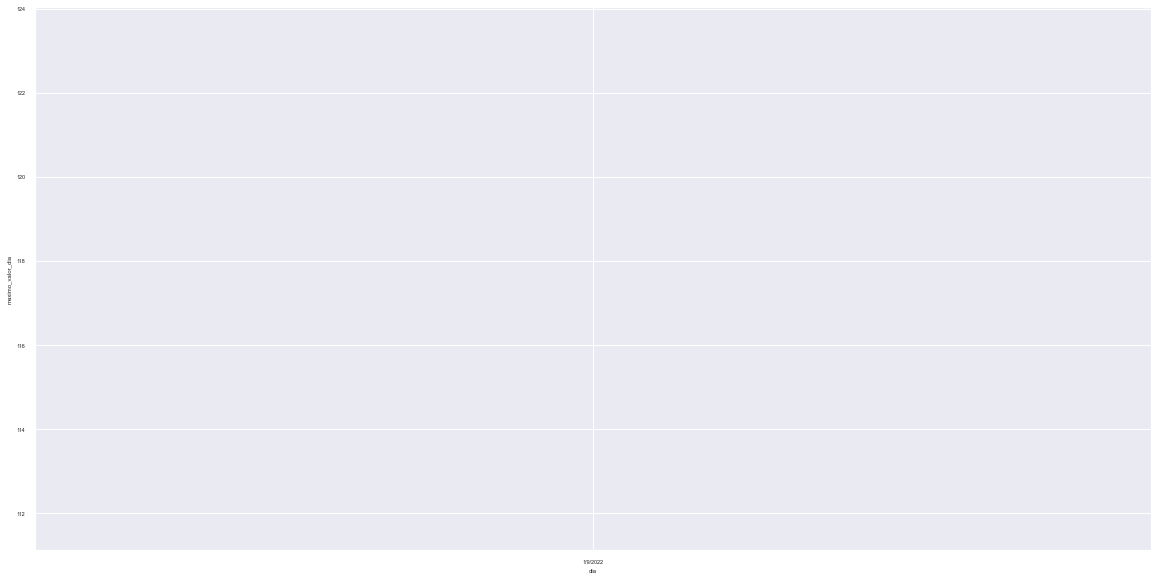

In [210]:
#dias que hubo mas emision de ozono en este mes el año 2022
print('DIAS QUE HUBO MAS EMISION DE OZONO EN EL MES DE SEPTIEMBRE DEL 2022')
sns.lineplot(data=b, x="dia", y="maximo_valor_dia")

In [211]:
#data = b.groupby(by=["municipio"], as_index = False)

#sns.set(rc={'figure.figsize':(5,5)})
#print(mun)

#sns.lineplot(data=mun["(ALCALÁ DE HENARES,)"])
#sns.lineplot(data=b, x="dia", y="maximo_valor_dia")

In [212]:
#sns.lineplot(data=data,x=data["municipio"],y=data["maximo_valor_dia"])

{117.58333333333333}


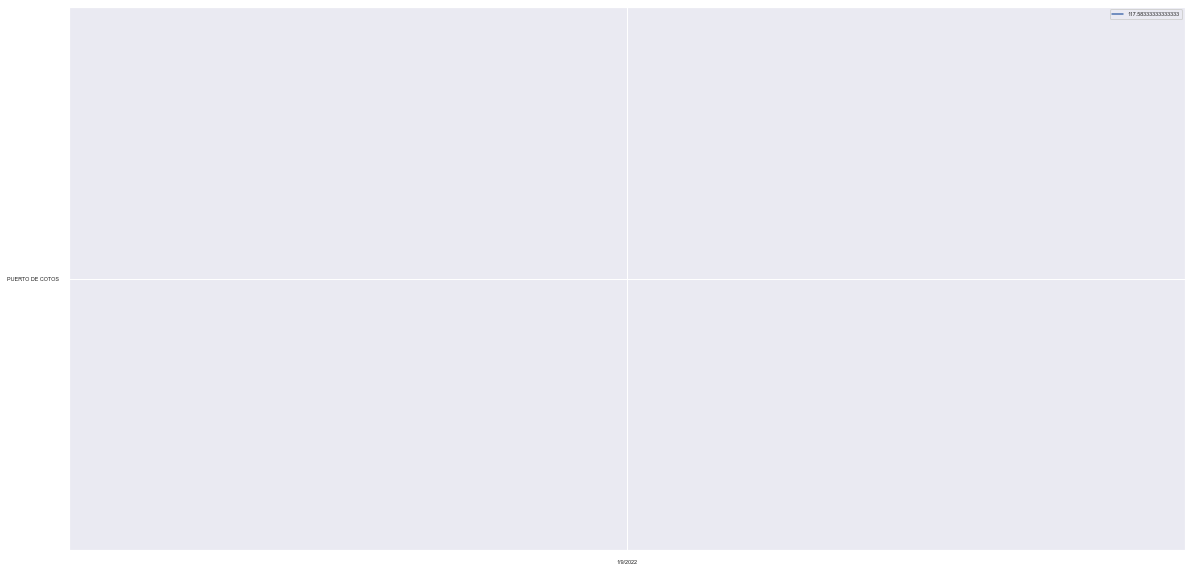

In [213]:
country_set = set(b['maximo_valor_dia'])
print(country_set)
plt.figure()
for country in country_set:
     selected_data = b.loc[b['maximo_valor_dia'] == country]
     plt.plot(selected_data['dia'], selected_data['municipio'], label=country)
plt.legend()
plt.show()
#y
#print(ozono['municipio'][i])


NameError: name 'maxValues' is not defined

In [ ]:
for mun in ozono["municipio"]:
    print(str(mun))

    if (mun!="nan"):
        cursor.execute("SELECT municipios FROM municipios where id_municipios="+str(mun))
        municipios = cursor.fetchall()
        print(municipios[0][0])
        nombremuni.append(municipios[0][0])
    else:
        nombremuni.append("nan")